In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from imblearn.over_sampling import SMOTE
!pip install umap
import umap


In [5]:
df = pd.read_csv(r'C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\Kinase_final_data.csv')
df.head()



,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3648023,CCCCc1ccc(Nc2nnc3cc(-c4cc(OC)cc(OC)c4)cc(C)c3n...,100000.0,inactive,428.536,6.10362,1,6,4.000000
1,CHEMBL154969,CONC(=O)CCc1c(SSc2[nH]c3ccccc3c2CCC(=O)NOC)[nH...,2900.0,intermediate,498.630,4.66900,4,6,5.537602
2,CHEMBL507058,COc1cc(O)c2c(c1)-c1cc(O)c(O)cc1COC2=O,10.0,active,288.255,2.14940,3,6,8.000000
3,CHEMBL3401367,COc1cccc(-c2nc3c(O)nc(NC(C)=O)nc3[nH]2)c1OC,9130.0,intermediate,329.316,1.70110,3,7,5.039529
4,CHEMBL3681299,Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(C(C)(C)C)ccc5[nH]...,150.0,active,412.497,4.64902,3,5,6.823909


In [7]:
print("--- Dataset Overview ---")
print(df.head())
df.columns
print(df.info())
print(df.describe())

--- Dataset Overview ---
  molecule_chembl_id                                   canonical_smiles  \
0      CHEMBL3648023  CCCCc1ccc(Nc2nnc3cc(-c4cc(OC)cc(OC)c4)cc(C)c3n...   
1       CHEMBL154969  CONC(=O)CCc1c(SSc2[nH]c3ccccc3c2CCC(=O)NOC)[nH...   
2       CHEMBL507058              COc1cc(O)c2c(c1)-c1cc(O)c(O)cc1COC2=O   
3      CHEMBL3401367        COc1cccc(-c2nc3c(O)nc(NC(C)=O)nc3[nH]2)c1OC   
4      CHEMBL3681299  Cc1nc2cc(-n3ncc(C(=O)c4cc5cc(C(C)(C)C)ccc5[nH]...   

   standard_value         class       MW     LogP  NumHDonors  NumHAcceptors  \
0        100000.0      inactive  428.536  6.10362           1              6   
1          2900.0  intermediate  498.630  4.66900           4              6   
2            10.0        active  288.255  2.14940           3              6   
3          9130.0  intermediate  329.316  1.70110           3              7   
4           150.0        active  412.497  4.64902           3              5   

      pIC50  
0  4.000000  
1  5.537602  
2

In [9]:
print(df.isnull().sum())

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
class                 0
MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
pIC50                 0
dtype: int64


In [11]:
df = df.drop_duplicates()

In [13]:
print(df.info())
print(f"Dataset shape after cleaning: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
Index: 20636 entries, 0 to 21440
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  20636 non-null  object 
 1   canonical_smiles    20636 non-null  object 
 2   standard_value      20636 non-null  float64
 3   class               20636 non-null  object 
 4   MW                  20636 non-null  float64
 5   LogP                20636 non-null  float64
 6   NumHDonors          20636 non-null  int64  
 7   NumHAcceptors       20636 non-null  int64  
 8   pIC50               20636 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.6+ MB
None
Dataset shape after cleaning: (20636, 9)


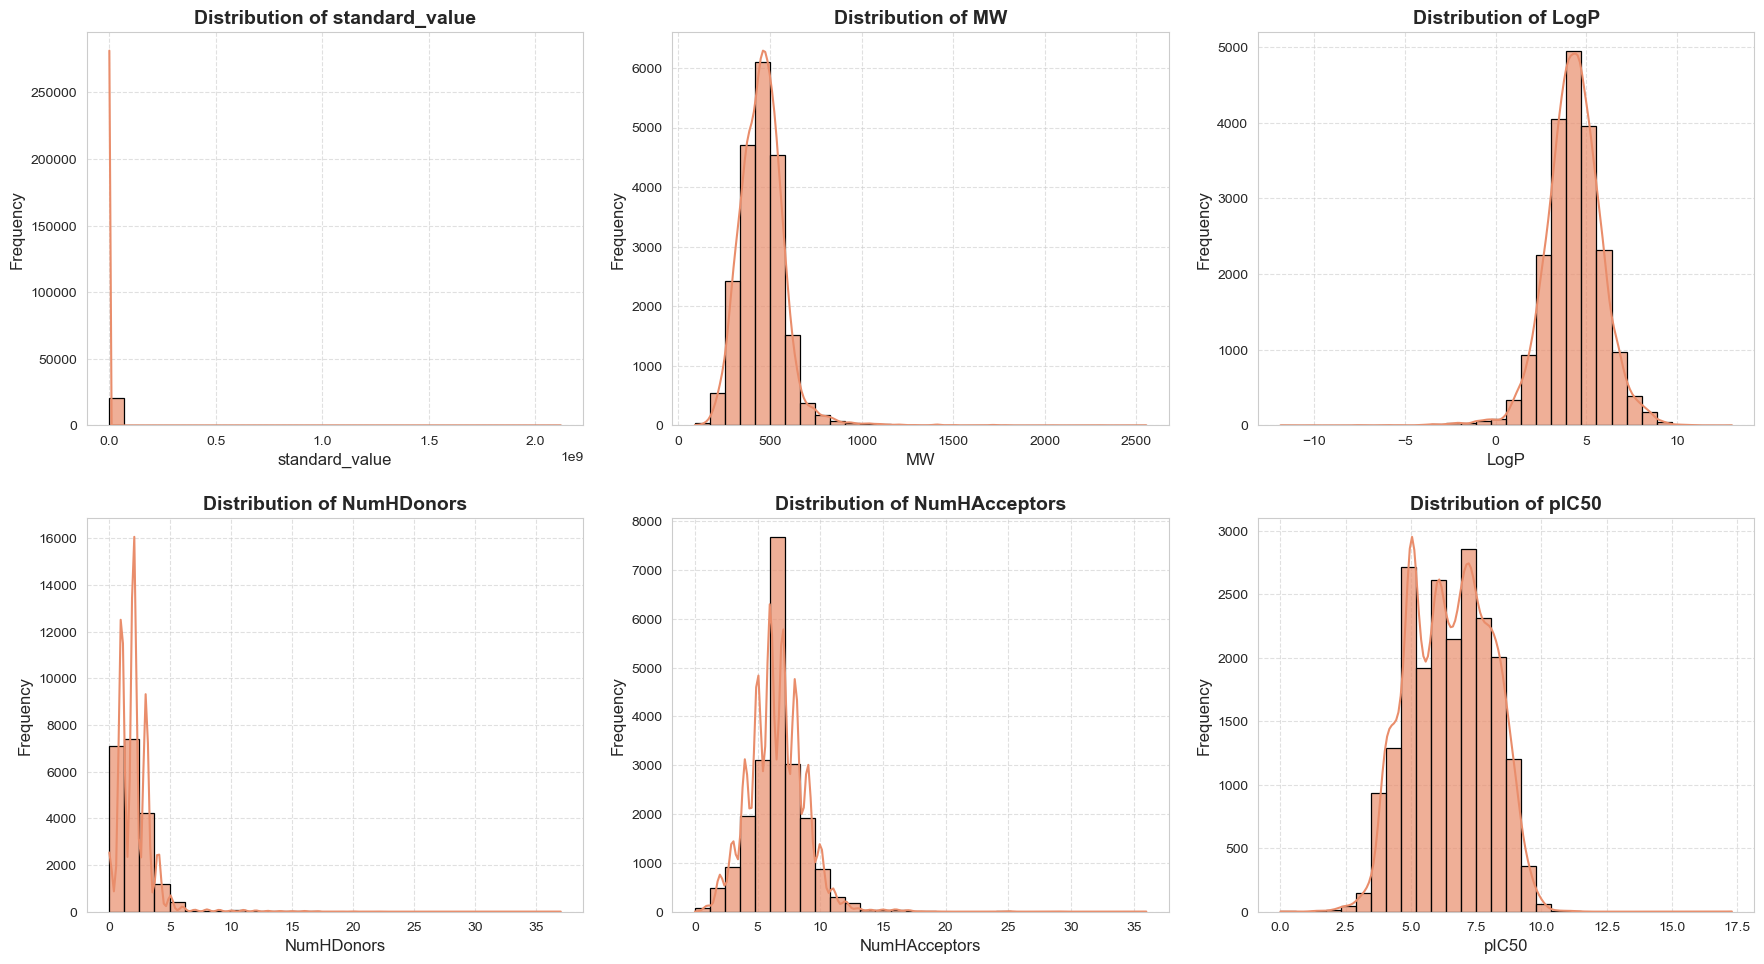

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Enhanced style
sns.set_style("whitegrid")
sns.set_palette("flare")

num_features = ["standard_value", "MW", "LogP", "NumHDonors", "NumHAcceptors", "pIC50"]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[row, col], alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f"Distribution of {feature}", fontsize=14, fontweight="bold")
    axes[row, col].set_xlabel(feature, fontsize=12)
    axes[row, col].set_ylabel("Frequency", fontsize=12)
    axes[row, col].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout(pad=2.0)
plt.show()

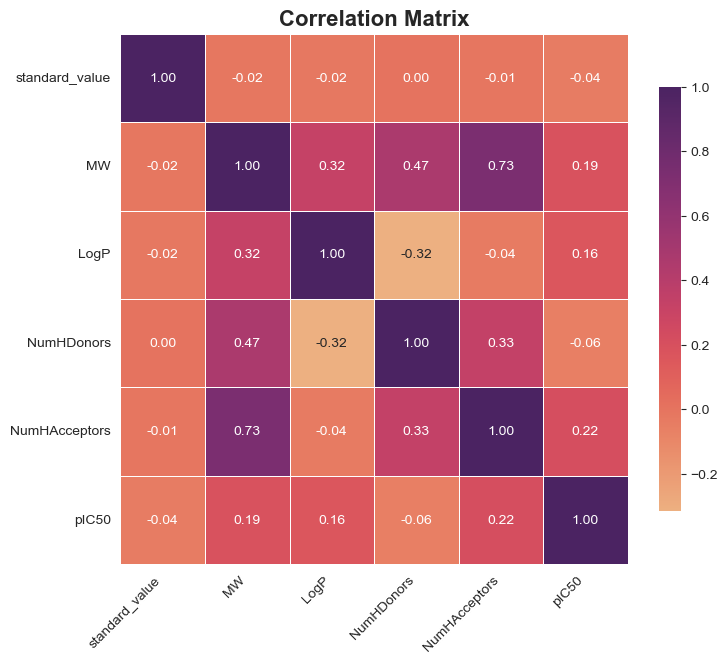

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 7))
sns.heatmap(df[num_features].corr(),
            annot=True,
            cmap="flare",
            fmt=".2f",
            linewidths=0.5,
            linecolor="white",
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix", fontsize=16, fontweight="bold")
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout(pad=2.0)
plt.show()

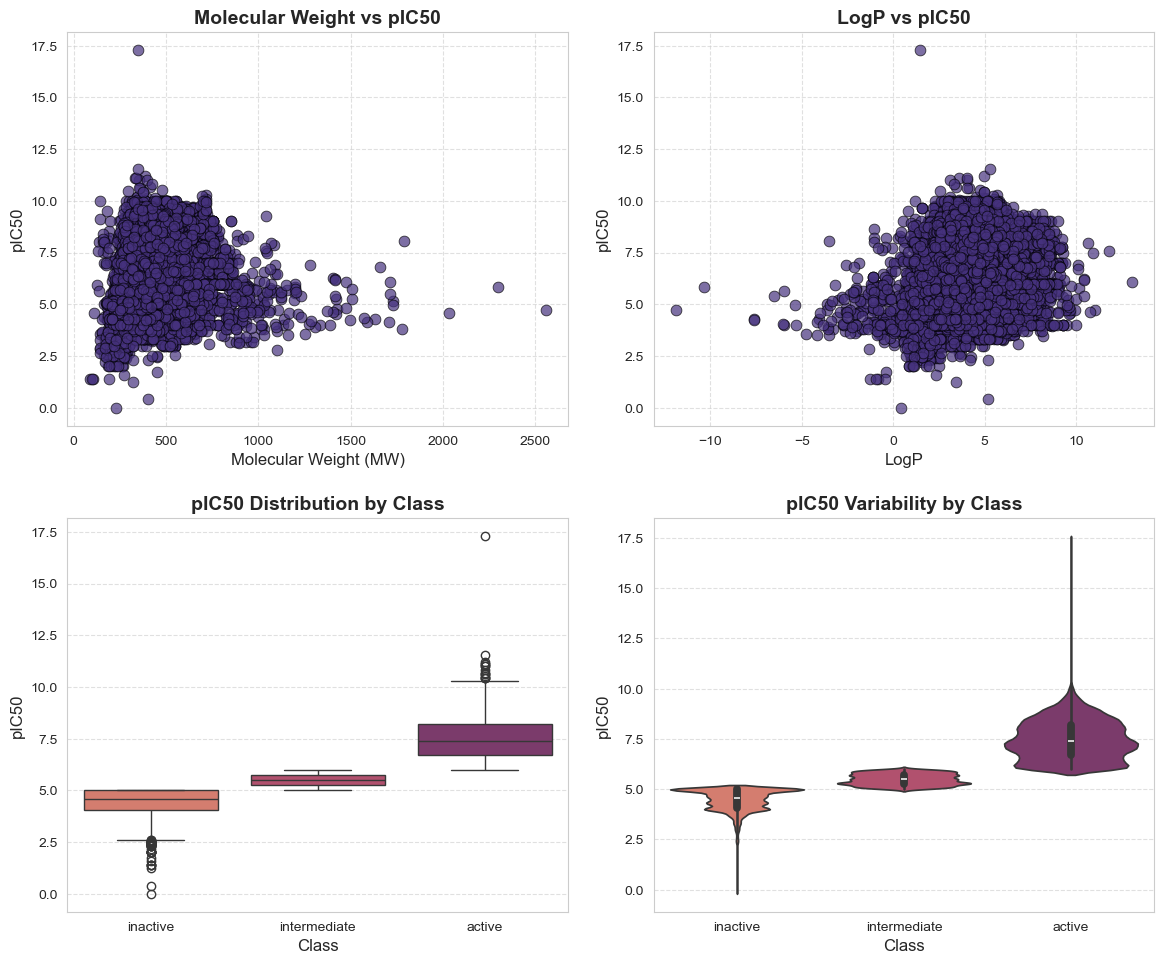

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("viridis")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatterplot 1: MW vs pIC50
sns.scatterplot(x=df["MW"], y=df["pIC50"], ax=axes[0, 0], alpha=0.7, edgecolor="black", s=60)
axes[0, 0].set_title("Molecular Weight vs pIC50", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel("Molecular Weight (MW)", fontsize=12)
axes[0, 0].set_ylabel("pIC50", fontsize=12)
axes[0, 0].grid(True, linestyle="--", alpha=0.6)

# Scatterplot 2: LogP vs pIC50
sns.scatterplot(x=df["LogP"], y=df["pIC50"], ax=axes[0, 1], alpha=0.7, edgecolor="black", s=60)
axes[0, 1].set_title("LogP vs pIC50", fontsize=14, fontweight="bold")
axes[0, 1].set_xlabel("LogP", fontsize=12)
axes[0, 1].set_ylabel("pIC50", fontsize=12)
axes[0, 1].grid(True, linestyle="--", alpha=0.6)

# Boxplot: pIC50 Distribution by Class
sns.boxplot(x=df["class"], y=df["pIC50"], ax=axes[1, 0], palette="flare", hue=df["class"], legend=False)
axes[1, 0].set_title("pIC50 Distribution by Class", fontsize=14, fontweight="bold")
axes[1, 0].set_xlabel("Class", fontsize=12)
axes[1, 0].set_ylabel("pIC50", fontsize=12)
axes[1, 0].grid(True, axis="y", linestyle="--", alpha=0.6)

# Violinplot: pIC50 Variability by Class
sns.violinplot(x=df["class"], y=df["pIC50"], ax=axes[1, 1], palette="flare", hue=df["class"], legend=False)
axes[1, 1].set_title("pIC50 Variability by Class", fontsize=14, fontweight="bold")
axes[1, 1].set_xlabel("Class", fontsize=12)
axes[1, 1].set_ylabel("pIC50", fontsize=12)
axes[1, 1].grid(True, axis="y", linestyle="--", alpha=0.6)

plt.tight_layout(pad=2.0)
plt.show()

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_15228\2606764676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="flare")  # Select a nice palette


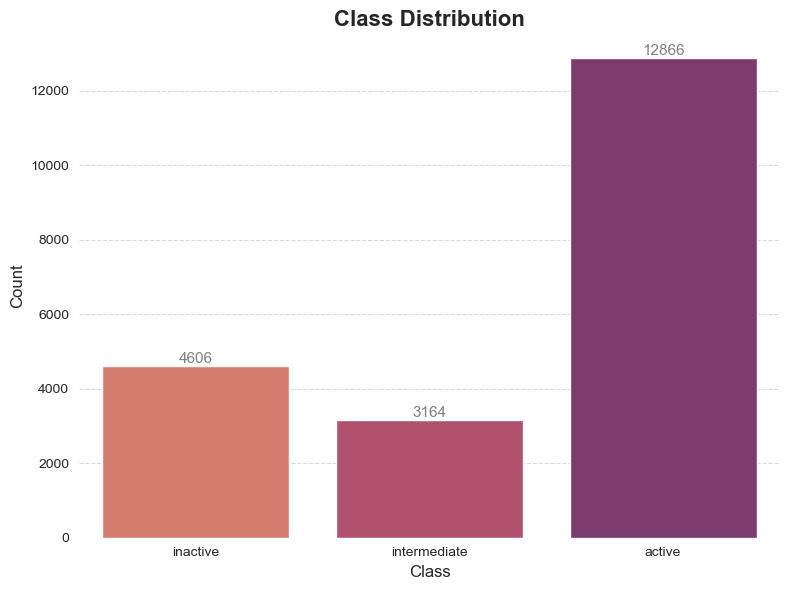

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x="class", data=df, palette="flare")

plt.title("Class Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                       textcoords='offset points')

sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Goal: 
## Can we group molecules based on their properties to match the class label?

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["MW", "LogP", "NumHDonors", "NumHAcceptors"]])

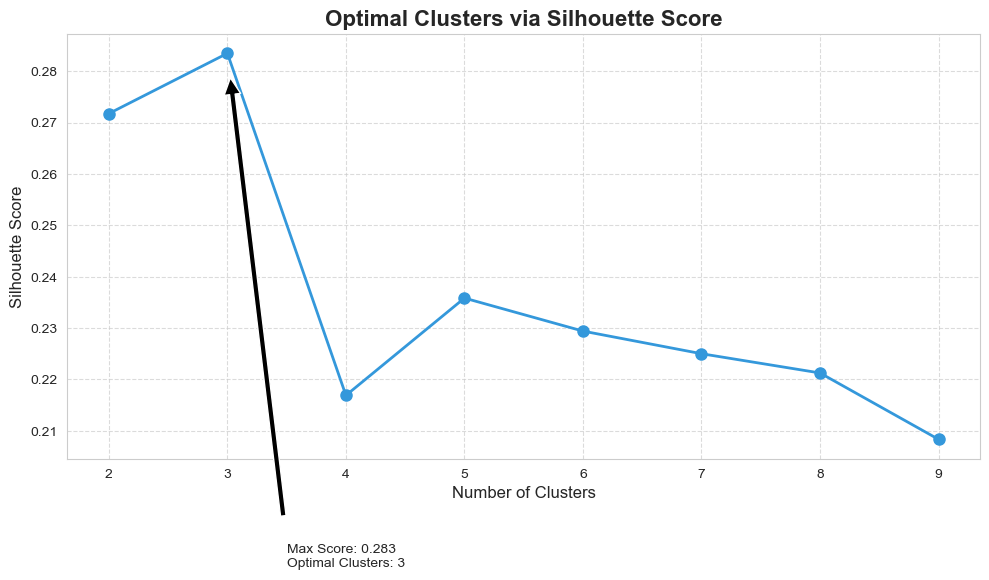

In [21]:
# Find optimal k using silhouette score
silhouettes = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouettes.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(range(2, 10), silhouettes, marker='o', linestyle='-', color='#3498db', markersize=8, linewidth=2)

# Enhanced title and labels
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Optimal Clusters via Silhouette Score", fontsize=16, fontweight="bold")

plt.grid(True, linestyle='--', alpha=0.7)

max_silhouette = max(silhouettes)
optimal_clusters = range(2,10)[silhouettes.index(max_silhouette)]
plt.annotate(f'Max Score: {max_silhouette:.3f}\nOptimal Clusters: {optimal_clusters}',
             xy=(optimal_clusters, max_silhouette),
             xytext=(optimal_clusters + 0.5, max_silhouette - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10
plt.xticks(range(2, 10))
plt.tight_layout()
plt.show()


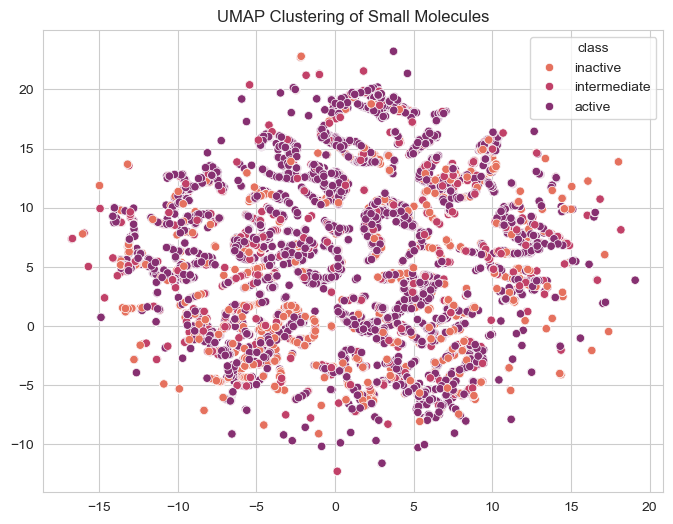

In [29]:
import umap.umap_ as umap
# Dimensionality reduction using UMAP
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_jobs=-1, random_state=None)
embedding = reducer.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=df["class"], palette="flare")
plt.title("UMAP Clustering of Small Molecules")
plt.show()


## *Result*: No clear clustering of the results

In [32]:
X = df[["MW", "LogP", "NumHDonors", "NumHAcceptors"]]
y = df["pIC50"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": RandomForestRegressor(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} R² Score: {r2_score(y_test, y_pred):.3f}")


Linear Regression R² Score: 0.082
Random Forest R² Score: 0.309
XGBoost R² Score: 0.309


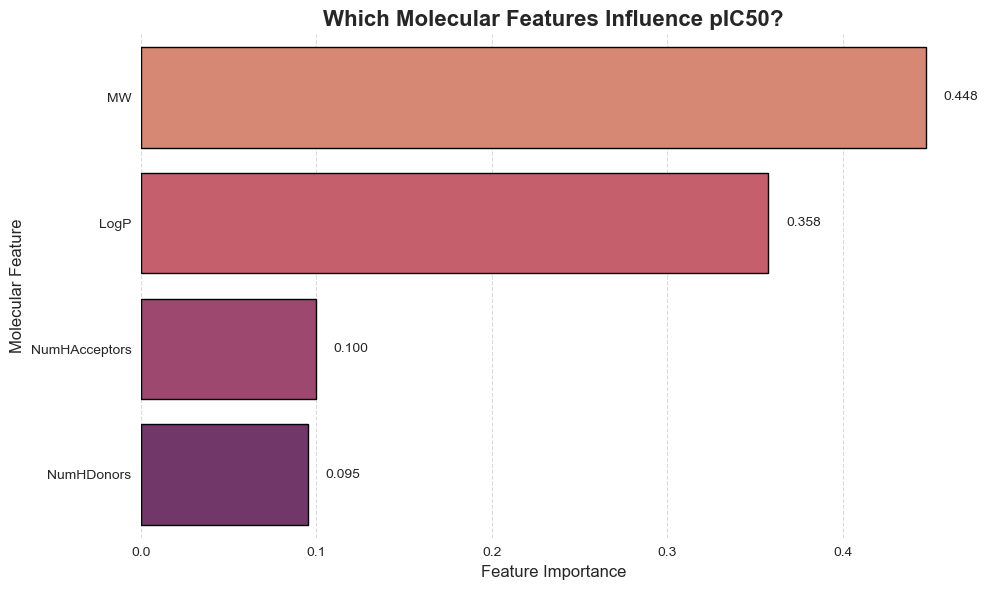

In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Plot
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))

# Enhanced barplot
sns.barplot(x=feature_importances.values,
            y=feature_importances.index,
            palette="flare",
            edgecolor="black",
            linewidth=1,
            hue=feature_importances.index,
            legend=False)

plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Molecular Feature", fontsize=12)
plt.title("Which Molecular Features Influence pIC50?", fontsize=16, fontweight="bold")

sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(feature_importances.values):
    plt.text(value + 0.01, index, f'{value:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [38]:
selected_features = ['MW', 'LogP']
X2 = df[selected_features]
y2 = df['pIC50']

In [40]:
from sklearn.model_selection import train_test_split
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled_selected = scaler.fit_transform(X_train_selected)
X_test_scaled_selected = scaler.transform(X_test_selected)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor_selected = RandomForestRegressor(random_state=42)

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {
      'n_estimators': [100, 200],
      'max_depth': [None, 5],
      'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf_regressor_selected, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled_selected, y_train_selected)
best_rf_regressor_selected = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [58]:
best_rf_regressor_selected.fit(X_train_scaled_selected, y_train_selected)
y_pred_selected = best_rf_regressor_selected.predict(X_test_scaled_selected)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")
print(f"MAE: {mae:.4f}")

MSE: 1.6145
RMSE: 1.2706
R2: 0.3090
MAE: 0.9874


## R2 did not improve so much